## 요구사항 분석 및 문제 정의
- 간단한 EDA와 관련된 함수를 학습
- BMI 데이터를 확인해 보고 잘 분류가 될 수 있는지 시각화
- KNN의 개념에 대해서 학습
- KNN을 이용해서 학습
- 머신러닝 프로세스에 대해 학습

## 데이터 수집

In [5]:
import pandas as pd
bmi = pd.read_csv("./data/bmi_500.csv")


## EDA(탐색적 데이터 분석)

In [6]:
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [7]:
# 데이터의 정보를 출력하는 함수
# 데이터의 수, 칼럼의 수, 칼럼의 특성- 결측치 확인
# Dtype : object(범주형), int / float (수치형)
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [8]:
# 범주형 칼럼의 클래스의 목록을 출력하는 함수
print(bmi["Gender"].unique())

['Male' 'Female']


In [9]:
# 범주형 칼럼의 클래스별 개수를 확인
# 데이터가 한쪽으로 치우쳐 있는지 확인
print(bmi["Gender"].value_counts())

Female    255
Male      245
Name: Gender, dtype: int64


In [10]:
# 수치형 데이터의 편향을 확인하는 함수
# 0에 가까우면 중앙인 것
# 0이면 정규분포
# 양수이면 왼쪽으로 치우친 데이터, 음수이면 오른쪽으로 치우친 데이터
print(bmi["Height"].skew())
print(bmi["Weight"].skew())

-0.12191368980139153
-0.037692236922098034


In [11]:
# 데이터의 간단한 기술통계를 보여주는 함수
# 데이터 개수, 평균, 표준편차, 최소/25/중간값/75%/최대값
# 결측치, 이상치, 편향 들을 알 수 있다.
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### BMI 데이터가 분류가 될 수 있는 데이터인지 확인

In [12]:
# matplotlib : 파이썬 그래프 시각화 도구
# seaborn: matplotlib에 고급 시각화 도구를 제공
import matplotlib.pyplot as plt

# scatter : 산포도를 그리는 함수 (2차원 좌표에 점을 찍는 함수)
# x좌표 : Weight, y좌표 : Height
def myScatter(label, color):
    # 파라미터로 넘어온 라벨의 해당 값들을 저장 - 불리언 인덱싱
    tmp = bmi[bmi["Label"]== label]
    # 입력한 라벨값만 산포도를 그림
    # scatter(x좌표, y좌표, 색상, 라벨)
    plt.scatter(tmp["Weight"],tmp["Height"], c= color, label = label)

In [13]:
bmi["Label"].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

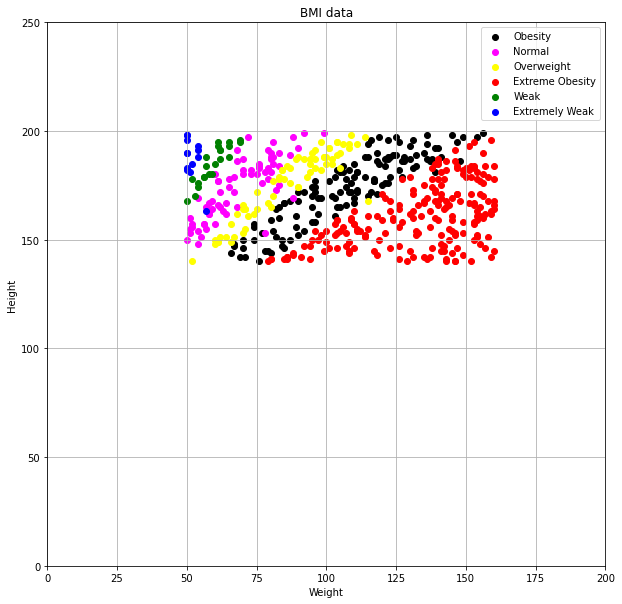

In [14]:
# 그래프 크기 설정
plt.figure(figsize = (10,10))

myScatter("Obesity",'black')
myScatter("Normal",'magenta')
myScatter("Overweight",'yellow')
myScatter("Extreme Obesity",'red')
myScatter("Weak",'green')
myScatter("Extremely Weak",'blue')

# 범례 추가
plt.legend(loc= "upper right")
# X 축 라벨 표시(기본적으로 한글은 지원하지 않음)
plt.xlabel("Weight")
# x축 눈금의 범위
plt.xlim(0,200)
plt.ylim(0,250)
plt.ylabel('Height')
# 제목 표시
plt.title("BMI data")
# 격자 표시
plt.grid()

### 학습 데이터로 변환

- 특성데이터와 라벨데이터로 분리
- 훈련데이터와 테스트데이터로 분리

In [15]:
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [16]:
bmi_X = bmi.iloc[:,1:3]
bmi_y = bmi.iloc[:,3]
bmi_X.shape, bmi_y.shape



((500, 2), (500,))

In [17]:
# 훈련 70 테스트 30으로 분리
X_train = bmi_X.iloc[0:350,:]
y_train = bmi_y.iloc[0:350]
X_test = bmi_X.iloc[350:,:]
y_test = bmi_y.iloc[350:]
X_train

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
345,184,106
346,191,68
347,162,58
348,178,138


In [18]:
# KNN 모델을 로드
from sklearn.neighbors import KNeighborsClassifier as kn

# 모델 선언
# n_neighbors : 가까운 참고 데이터의 수
knn_model = kn(n_neighbors=1)  # 가장 가까운 한개만 참고하겠다.


# 특성데이터와 라벨데이터를 입력해서 훈련 - fit(특성데이터, 라벨데이터)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred_y = knn_model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print(knn_model.score(X_test,y_test))
print(accuracy_score(pred_y,y_test))

0.8933333333333333
0.8933333333333333


In [21]:
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# Hyper Parameter Turning : 적당한 이웃의 수를 결정하는 것
knn_model = KNeighborsClassifier(n_neighbors=3)
# 훈련은 훈련데이터로
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# 정확도 계산
# 훈련정확도와 테스트정확도가 모두 낮으면 -> 과소적합
# 훈련정확도보다 테스트 정확도가 높으면 -> 과소 적합
# 훈련정확도와 테스트 정확도가 크게 차이나면 -> 과대적합
# 일반화 모델 : 훈련정확도가 테스트정확도보다 약간 높은 모델
print("훈련 정확도 : ", knn_model.score(X_train, y_train))
print("테스트 정확도 : ", knn_model.score(X_test,y_test))

훈련 정확도 :  0.9342857142857143
테스트 정확도 :  0.9


In [24]:
knn_model2 = KNeighborsClassifier(n_neighbors=1)
knn_model2.fit(X_train,y_train)
print("훈련 정확도 : ", knn_model2.score(X_train, y_train))
print("테스트 정확도 : ", knn_model2.score(X_test,y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8933333333333333


In [25]:
knn_model3 = KNeighborsClassifier(n_neighbors=10)
knn_model3.fit(X_train,y_train)
print("훈련 정확도 : ", knn_model3.score(X_train, y_train))
print("테스트 정확도 : ", knn_model3.score(X_test,y_test))

훈련 정확도 :  0.9085714285714286
테스트 정확도 :  0.94


### 일반화된 모델을 찾아보자 - 하이퍼 파라미터 튜닝

In [26]:
import pandas as pd

In [27]:
train_acc =[]
test_acc = []

neighbor = range(1,20)

for i in neighbor:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    
    train_acc.append(knn_model.score(X_train,y_train))
    test_acc.append(knn_model.score(X_test,y_test))
print(train_acc)
print(test_acc)


[1.0, 0.9485714285714286, 0.9342857142857143, 0.9514285714285714, 0.9257142857142857, 0.9085714285714286, 0.9028571428571428, 0.9057142857142857, 0.9057142857142857, 0.9085714285714286, 0.9085714285714286, 0.9114285714285715, 0.9114285714285715, 0.9, 0.8942857142857142, 0.8971428571428571, 0.9, 0.88, 0.8857142857142857]
[0.8933333333333333, 0.8933333333333333, 0.9, 0.8933333333333333, 0.9066666666666666, 0.9133333333333333, 0.9, 0.9133333333333333, 0.9133333333333333, 0.94, 0.8866666666666667, 0.9133333333333333, 0.9133333333333333, 0.8866666666666667, 0.8933333333333333, 0.9, 0.8933333333333333, 0.8933333333333333, 0.86]


In [28]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


# gender특성 추가

In [29]:
import pandas as pd
bmi = pd.read_csv("./data/bmi_500.csv")


In [30]:
# Gender 컬럼에서 Male => 0 으로 Female -> 1로 변경

#bmi1=bmi['Gender'].replace(['Male','Female'],[0,1])
bmi["Gender"] = bmi["Gender"].map({"Male":0,"Female":1})
#bmi = bmi['Gender'].replace("Male",1).replace("Female",0)
bmi

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight
...,...,...,...,...
495,1,150,153,Extreme Obesity
496,1,184,121,Obesity
497,1,141,136,Extreme Obesity
498,0,150,95,Extreme Obesity


In [31]:
bmi_X = bmi.iloc[:,:3]
bmi_y = bmi.iloc[:,3]
bmi_X.shape, bmi_y.shape



((500, 3), (500,))

In [32]:
X_train = bmi_X.iloc[0:350,:]
y_train = bmi_y.iloc[0:350]
X_test = bmi_X.iloc[350:,:]
y_test = bmi_y.iloc[350:]
X_train

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
345,1,184,106
346,1,191,68
347,0,162,58
348,0,178,138


In [33]:
train_acc =[]
test_acc = []

neighbor = range(1,20)

for i in neighbor:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    
    train_acc.append(knn_model.score(X_train,y_train))
    test_acc.append(knn_model.score(X_test,y_test))
print(train_acc)
print(test_acc)


[1.0, 0.9457142857142857, 0.9371428571428572, 0.9514285714285714, 0.9257142857142857, 0.9085714285714286, 0.9057142857142857, 0.9057142857142857, 0.9057142857142857, 0.9085714285714286, 0.9085714285714286, 0.9114285714285715, 0.9114285714285715, 0.9, 0.8914285714285715, 0.8971428571428571, 0.9028571428571428, 0.88, 0.8857142857142857]
[0.9, 0.8933333333333333, 0.8933333333333333, 0.8933333333333333, 0.9066666666666666, 0.9133333333333333, 0.9, 0.9066666666666666, 0.92, 0.9266666666666666, 0.8866666666666667, 0.9133333333333333, 0.9066666666666666, 0.8866666666666667, 0.8866666666666667, 0.8866666666666667, 0.8933333333333333, 0.8933333333333333, 0.86]


# 특성끼리 곱해서 새로운 특성추가

In [34]:
X_train2 = X_train.copy()

col =X_train2.columns

for i in range(col.size):
    for j in range(i, col.size):
        X_train2[col[i]+ "x" + col[j]] = X_train2[col[i]] * X_train2[col[j]]
X_train2.head()

,Gender,Height,Weight,GenderxGender,GenderxHeight,GenderxWeight,HeightxHeight,HeightxWeight,WeightxWeight
0,0,174,96,0,0,0,30276,16704,9216
1,0,189,87,0,0,0,35721,16443,7569
2,1,185,110,1,185,110,34225,20350,12100
3,1,195,104,1,195,104,38025,20280,10816
4,0,149,61,0,0,0,22201,9089,3721


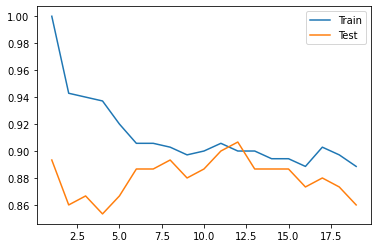

In [35]:
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as mlt
X_train2 = X_train.copy()

col =X_train2.columns

for i in range(col.size):
    for j in range(i, col.size):
        X_train2[col[i]+ "x" + col[j]] = X_train2[col[i]] * X_train2[col[j]]
        
X_test2 = X_test.copy()

col =X_test2.columns

for i in range(col.size):
    for j in range(i, col.size):
        X_test2[col[i]+ "x" + col[j]] = X_test2[col[i]] * X_test2[col[j]]

train_acc =[]
test_acc = []

neighbor = range(1,20)

for i in neighbor:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train2,y_train)
    
    train_acc.append(knn_model.score(X_train2,y_train))
    test_acc.append(knn_model.score(X_test2,y_test))
    
plt.plot(neighbor, train_acc, label="Train")
plt.plot(neighbor, test_acc, label="Test")
plt.legend()

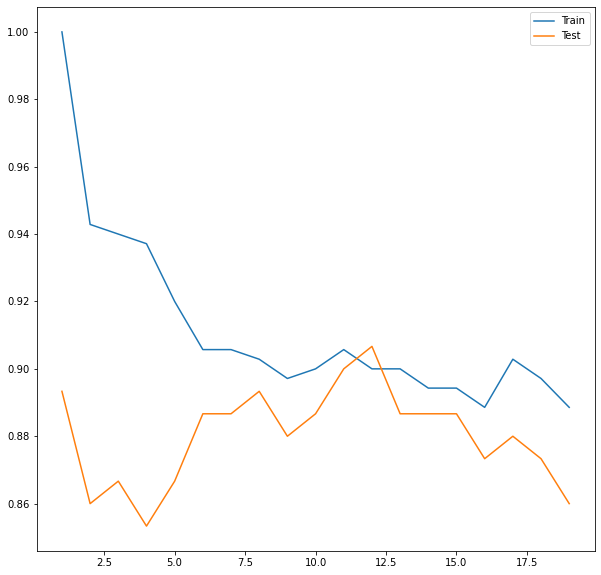

In [36]:
import matplotlib.pyplot as mlt
# 그래프 크기 설정

plt.figure(figsize = (10,10))
plt.plot(neighbor, train_acc, label = "Train")
plt.plot(neighbor, test_acc, label = "Test")
plt.legend()
plt.show()